# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_sparc4acs4_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_V462Lup_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_V462Lup_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:57:57.583000,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:58:48.703076,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:59:39.823152,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:00:30.943228,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:01:22.063303,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:01.263000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,12,L4,None,True
8857,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:43.726000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,13,L4,None,True
8858,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:00:26.287000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,14,L4,None,True
8859,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:01:08.927000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     168   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP010    1 TableHDU        51   5R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP010    1 TableHDU        51   5R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   


Then we plot the science frame using the `sparc4.product_plots` library

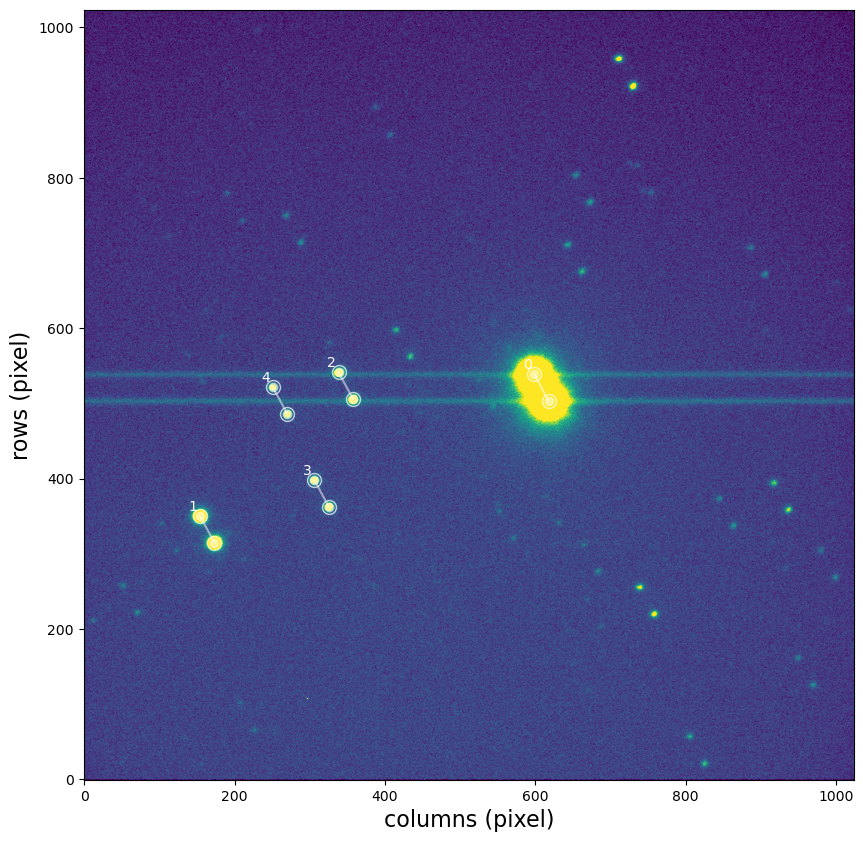

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,227.002828,-40.138966,617.591173,503.445732,6.957864,6.957864,-16.515426,0.001548,-14.844742,0.000493,10,0
1,1,227.057785,-40.156778,173.219948,314.919619,6.301205,6.301205,-12.744019,0.022725,-14.833498,0.000137,10,0
2,2,227.035100,-40.138740,357.571221,505.765141,6.592512,6.592512,-10.959655,0.111690,-14.833386,0.000166,10,0
3,3,227.039052,-40.152300,325.273918,362.668782,6.349248,6.349248,-10.549511,0.162185,-14.833248,0.000128,10,0
4,4,227.045926,-40.140600,270.151206,486.155536,6.192946,6.192946,-10.060899,0.253695,-14.833491,0.000164,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

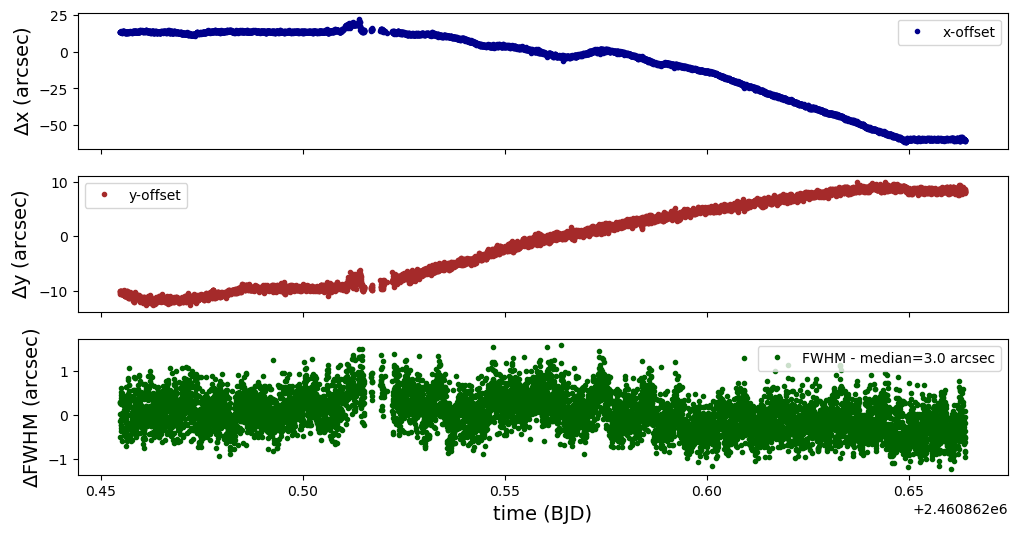

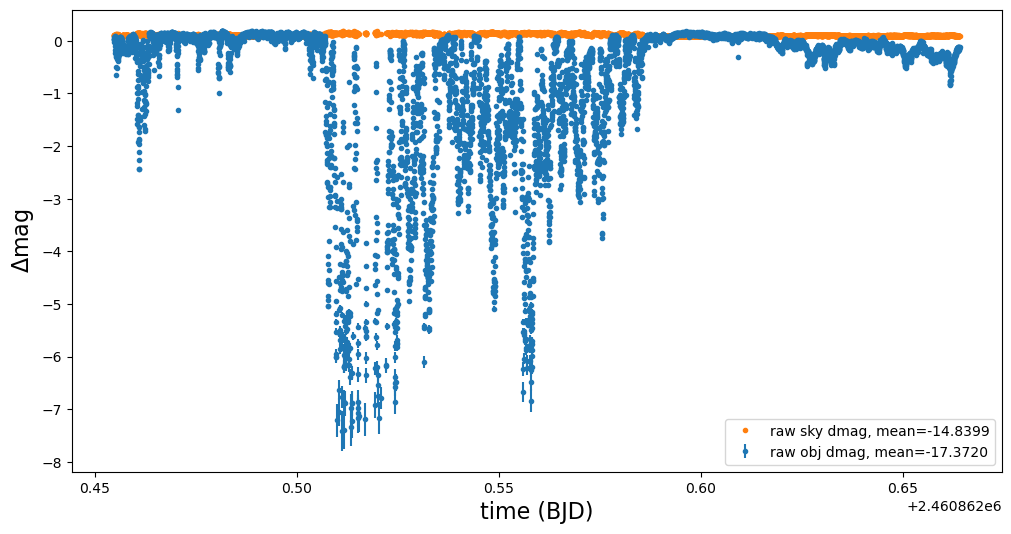

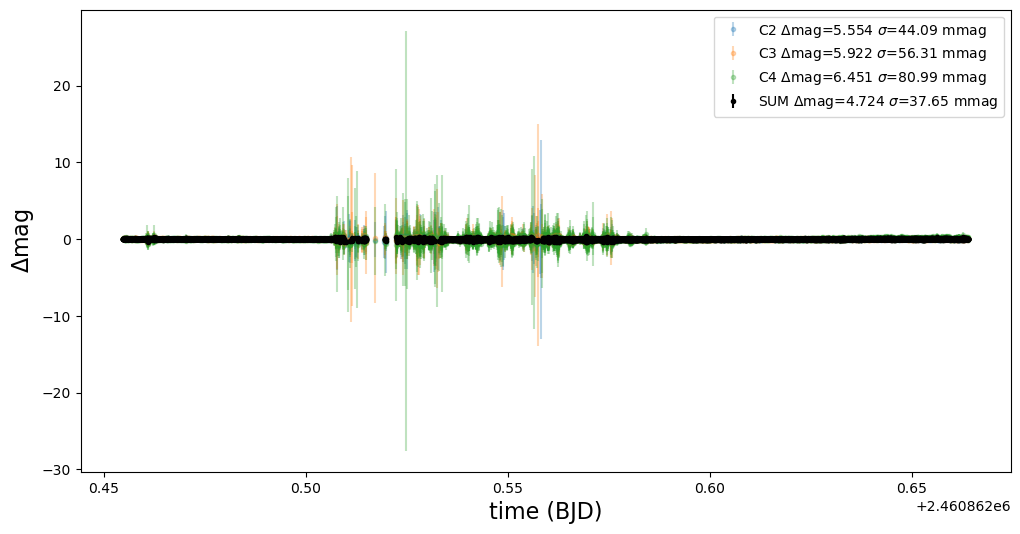

       TIME                x          ...       diffmagsum     
------------------ ------------------ ... ---------------------
2460862.4547876753  608.1203816656434 ...  0.027847842092916686
2460862.4548023744  608.3703816656434 ...   0.06684818434264361
 2460862.454836515  608.8703816656434 ...   0.03581894894841131
 2460862.454851214  608.8703816656434 ...  0.030776431846624597
2460862.4548841272  609.1203816656434 ...  0.015420241504545906
2460862.4548988263  608.8703816656434 ...   0.02855335207747256
2460862.4549314273  609.6203816656434 ...   0.02869497314138858
               ...                ... ...                   ...
   2460862.6638815 388.62038166564344 ...   0.04074206247227696
 2460862.663915455 388.12038166564344 ... -0.024071264467132814
 2460862.663930154 388.37038166564344 ...   0.02804071991100532
 2460862.663966783 388.87038166564344 ...  0.042183761381715534
 2460862.663981481 386.62038166564344 ...  -0.02385186935147754
 2460862.664012844 387.62038166564344 ..

In [20]:
catalog = 'CATALOG_PHOT_AP010'
target=0
comps=[2,3,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

FileNotFoundError: [Errno 2] No such file or directory: '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits'

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

NameError: name 'polar' is not defined

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

NameError: name 'polar' is not defined

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

In [11]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

FileNotFoundError: [Errno 2] No such file or directory: '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits'

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

NameError: name 'pol_results' is not defined

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

NameError: name 'pol_results' is not defined

Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

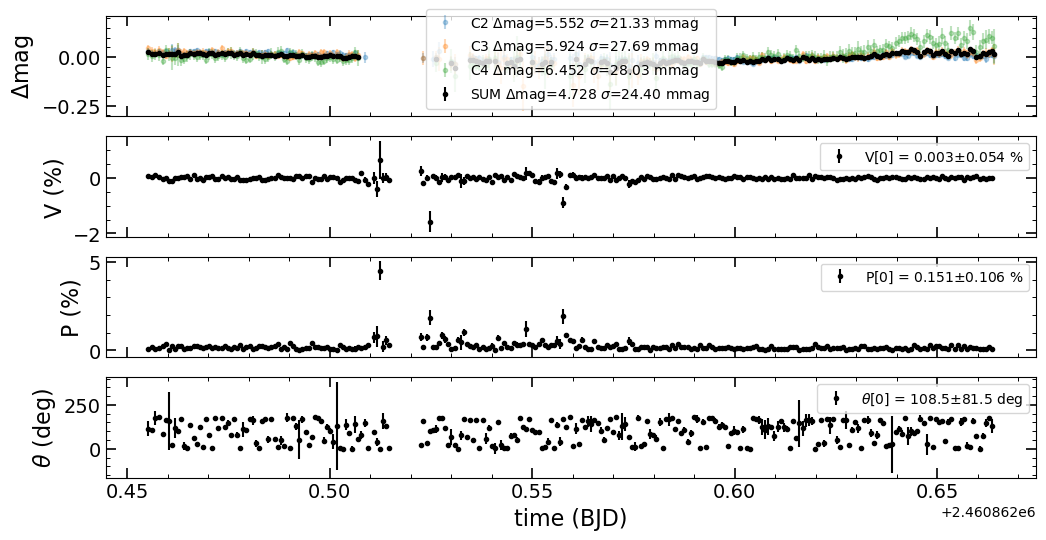

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.030859820746736766,0.013579476291073318,0.04505379275073729,0.019262155462810016,0.016669519643786046,0.030454035861048348,2460862.4551567654,598.6495900003418,538.7511772773571,617.591173330945,503.4457319365283,6.317642519958128,-21.125679058770295,0.00018555945147607938,-16.370177872220676,0.03850685410039629,0.027442285878624517,0.00044910538563587083,0.0006337078047766404,115.30920323964952,40.3558803708194
0.023406961952001204,0.013418066741093065,0.03259355873657377,0.018942500384524556,0.006859343806050688,0.030018968378088196,2460862.4560100874,600.1495900003418,538.0011772773571,619.091173330945,502.6957319365283,6.261950818145876,-21.130628298481096,0.00018492805398351243,-16.384706685558342,0.03794599719621754,0.01786271225175895,0.0016001710207010282,0.0004713628990663974,108.2510949203153,8.424711320789328
0.02354994007544331,0.012604281562600458,0.02780771840899554,0.017711372449857727,0.014060189502993481,0.028372353774718813,2460862.456782084,597.8995900003418,537.7511772773571,616.841173330945,502.4457319365283,6.917703080992254,-21.19430178623247,0.00017859356648137567,-16.448405697190346,0.03574150807532783,0.017837188371128576,0.0003803160938236737,0.0005277584788867689,177.06378432870588,39.68775642494789
0.029856095182922537,0.013919503627878685,0.036550278618642906,0.01961703881072395,0.00875515620015932,0.031036806679212273,2460862.4577245093,599.8995900003418,537.7511772773571,618.841173330945,502.4457319365283,6.1244436393634345,-21.126322190226926,0.00018627521539180933,-16.37571015073283,0.03926525265961198,0.022553138823102614,0.0013396789802694433,0.0004031472560621339,179.13233242977586,8.606548056055978
0.02348609950095959,0.011557222602689928,0.023969947503253763,0.016170655599798196,-0.017710816829509923,0.025249744521617008,2460862.4586619576,598.3995900003418,536.2511772773571,617.341173330945,500.9457319365283,6.281741117354607,-21.28627010025014,0.00016978188498956867,-16.548251152418224,0.032132889965842286,0.009960047160920027,0.0024151726808860356,0.0005094099983555562,85.35739516878186,6.03233303700009
0.030064488043632487,0.011785495773575681,0.004677544948677337,0.0161034710831241,0.034735850479606256,0.026858810170357142,2460862.459428544,599.3995900003418,535.2511772773571,618.341173330945,499.9457319365283,6.584306356130998,-21.271947514068263,0.00017122097006170385,-16.526530973835033,0.033459339883797734,0.017357639562234795,0.003350795041100231,0.0006446271104530945,166.73309699017787,5.502077904742555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.01083815667246224,0.015240033972384633,-0.0150014881712206,0.02084654523425762,0.027501304506543534,0.03516487717874226,2460862.6597135626,381.39959000034185,595.5011772773571,400.341173330945,560.1957319365283,5.1998373602368115,-20.97325699626037,0.00020133366057181355,-16.24481909354044,0.043626643979921,0.00037900204893759337,0.0014361738084869504,0.0005104749078946219,71.83466287742831,10.165609677262712
0.0001870625431985573,0.016115919146808516,-0.0020811853962054983,0.02253542499327808,0.051826071292387255,0.03842628422155844,2460862.660482699,381.39959000034185,595.2511772773571,400.341173330945,559.9457319365283,5.071405539205227,-20.902447214549934,0.00020945246449527094,-16.169838338718897,0.04737104535098918,0.004549975160042408,0.0008555057022818829,0.00035815241390124437,1.2593847761268198,11.973221230734174


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[2,3,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)